# Linear Regression

Linear regression is used to fit a line to data in order to make predictions. It's helpful for relationships where one variable can predict another, such as predicting house prices based on square footage or estimating weight from height. This simple model provides a rough approximation, allowing us to explain and predict variables with linear relationships.

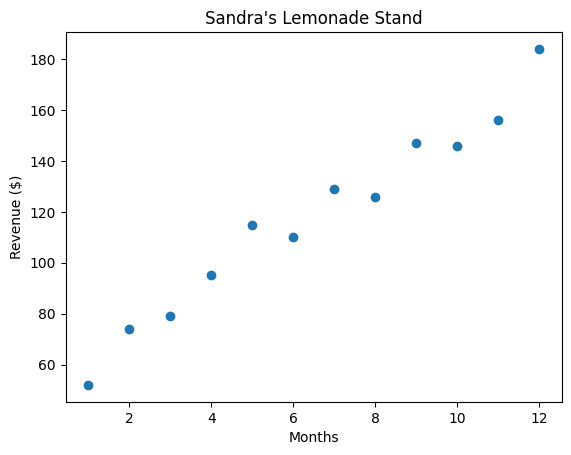

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")

plt.title("Sandra's Lemonade Stand")

plt.xlabel("Months")
plt.ylabel("Revenue ($)")

plt.show()

# What do you think the revenue in month 13 would be?
month_13 = 200

## Points and Lines

A line is defined by its slope (m) and intercept (b). In linear regression, we use the equation $y = mx + b$ to predict values, where the slope shows how steep the line is, and the intercept shows where it crosses the y-axis. The goal of linear regression is to find the best-fitting slope and intercept for a given set of data points.

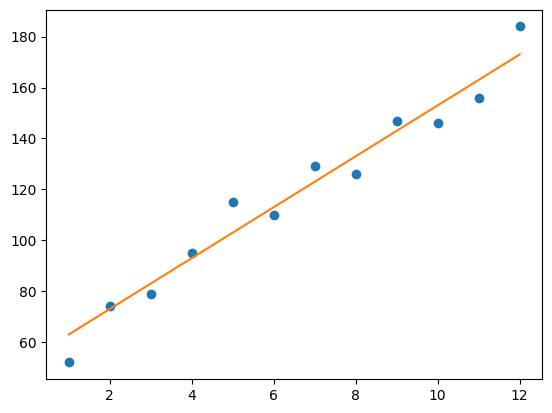

In [81]:
#slope:
m = 10
#intercept:
b = 53

y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()


## Loss

Loss measures how poorly a model fits the data by calculating the squared distance between each data point and the line. The goal is to minimize this loss. By squaring the distances, we ensure that points above and below the line contribute equally. For example, if the squared distance for two points is 9 and 1, the total loss is 10. A better-fitting line would have a lower total loss.

In [82]:
x = [1, 2, 3]
y = [5, 1, 3]

#y = x
m1 = 1
b1 = 0

#y = 0.5x + 1
m2 = 0.5
b2 = 1

y_predicted1 = [m1*x_val + b1 for x_val in x]
y_predicted2 = [m2*x_val + b2 for x_val in x]

total_loss1 = 0
total_loss2 = 0

for i in range(len(y)):
  total_loss1 += (y[i] - y_predicted1[i])**2
  total_loss2 += (y[i] - y_predicted2[i])**2
  
print(total_loss1, total_loss2)
better_fit = 2

17 13.5


### Minimizing Loss

In linear regression, the objective is to find the slope (m) and intercept (b) that minimize the total loss across all data points. By adjusting the slope and intercept, you can see the change in total loss, with the goal being to make it as small as possible. You can use interactive visualizations to test this by controlling the slope and intercept and comparing them to the best-fit line.

## Gradient Descent for Intercept

In gradient descent, the goal is to adjust parameters like the intercept (b) in a way that minimizes loss. The idea is to move in the direction that decreases loss, similar to walking downhill and stopping when you reach the lowest point. This process is guided by the gradient (the slope of the loss curve at any point).

For the intercept, if the gradient is negative, increasing the intercept reduces the loss. To update the intercept, we calculate the gradient using the formula:

$$
- \frac{2}{N} \sum_{i=1}^{N} (y_i - (m x_i + b))
$$


This equation helps guide how much to adjust the intercept based on the current slope and loss.

In [83]:
def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

## Gradient Descent for Slope

To find the gradient for the slope \( m \), we use the following formula:

$$
- \frac{2}{N} \sum_{i=1}^{N} x_i (y_i - (m x_i + b))
$$

Here’s a breakdown:

- \( N \) is the number of points in your dataset.
- \( m \) is the current slope guess.
- \( b \) is the current intercept guess.

To find the gradient of \( m \):

1. Compute the sum of \( x_i \times (y_i - (m x_i + b)) \) for all data points.
2. Multiply this sum by \(-\frac{2}{N}\).

With both \( m \) and \( b \) gradients, we adjust them to minimize the loss, ultimately finding the best-fitting line for our data.



In [84]:
def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

## Put it Together

Now that we understand how to calculate the gradient, we need to take a step in that direction to minimize the error. However, it's crucial to consider the size of this step to avoid overshooting the minimum error.

We adjust the size of the step by multiplying the gradient by a learning rate. To update the intercept \( b \), we use the formula:

$$
\text{new}_b = \text{current}_b - (\text{learning\_rate} \times b\_gradient)
$$

- **current_b**: The current guess for the intercept value.
- **b_gradient**: The gradient of the loss curve at the current guess.
- **learning_rate**: Controls the size of the step we take.

In upcoming exercises, we'll explore the effects of using a large or small learning rate, but for now, we'll use a relatively small value.


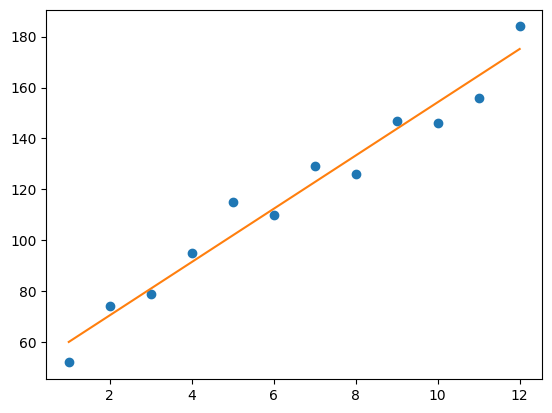

In [85]:
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]

def gradient_descent(x, y, learning_rate, num_iterations):
    b = 0
    m = 0
    for i in range(num_iterations):
        b, m = step_gradient(b, m, x, y, learning_rate)
    return [b, m]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

b, m = gradient_descent(months, revenue, 0.01, 1000)

y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

##

## Use the Functions on Real Data

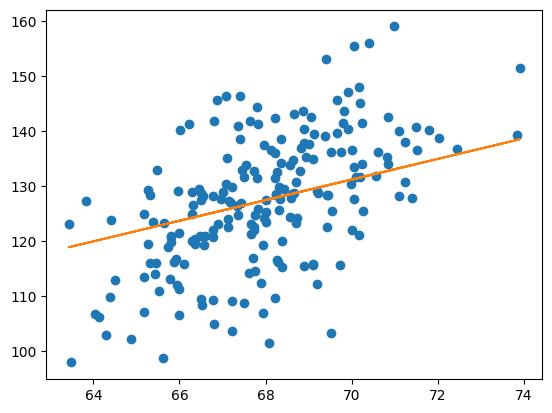

In [86]:
df = pd.read_csv("../../../assets/csv/heights.csv")

X = df["height"]
y = df["weight"]

plt.plot(X, y, 'o')

b, m = gradient_descent(X, y, num_iterations=1000, learning_rate=0.0001)
y_predictions = [m*x + b for x in X]

plt.plot(X, y_predictions)

plt.show()

## Scikit-Learn


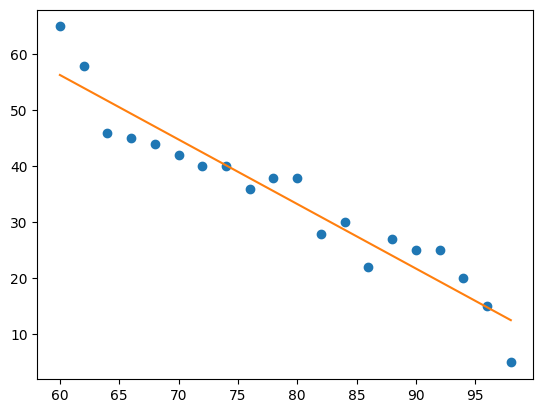

In [87]:
from sklearn.linear_model import LinearRegression

temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

plt.plot(temperature, sales, 'o')

line_fitter = LinearRegression()
line_fitter.fit(temperature, sales)
sales_predict = line_fitter.predict(temperature)

plt.plot(temperature, sales_predict)
plt.show()